In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
import math
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
from pandas_datareader import data as pdr



In [2]:
stock ='NVDA'
start ='2022-01-01'
end ='2024-01-01'
data =yf.download(stock,start,end)
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2022-01-03 00:00:00+00:00,30.073061,30.121000,30.711000,29.785000,29.815001,391547000
2022-01-04 00:00:00+00:00,29.243383,29.290001,30.468000,28.349001,30.277000,527154000
2022-01-05 00:00:00+00:00,27.560066,27.604000,29.416000,27.533001,28.948999,498064000
2022-01-06 00:00:00+00:00,28.133150,28.177999,28.438000,27.065001,27.639999,454186000
2022-01-07 00:00:00+00:00,27.203634,27.247000,28.422001,27.056999,28.141001,409939000


In [3]:
df = data.reset_index()
df.tail()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
496,2023-12-22 00:00:00+00:00,48.819527,48.830002,49.382999,48.466999,49.195000,252507000
497,2023-12-26 00:00:00+00:00,49.268425,49.278999,49.599998,48.959999,48.967999,244200000
498,2023-12-27 00:00:00+00:00,49.406395,49.417000,49.680000,49.084999,49.511002,233648000
499,2023-12-28 00:00:00+00:00,49.511375,49.521999,49.883999,49.411999,49.643002,246587000
500,2023-12-29 00:00:00+00:00,49.511375,49.521999,49.997002,48.750999,49.813000,389293000


In [4]:
x=df.drop(['Date','Close'], axis=1, inplace=True)
y=df[['Adj Close']]

In [5]:
df = df.to_numpy()

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(df,y,test_size=0.20, random_state=0)

In [7]:
from sklearn.linear_model import LinearRegression
regression_model =LinearRegression()
regression_model.fit(x_train,y_train)

LinearRegression()

In [8]:
intercept = regression_model.intercept_[0]
print(intercept)

-5.268674385661143e-12


In [9]:
regression_model.score(x_test,y_test)

1.0

In [10]:
from sklearn.metrics import mean_squared_error
y_predict =regression_model.predict(x_test)
regression_model_mse = mean_squared_error(y_predict,y_test)
regression_model_mse

np.float64(1.9454372151295794e-24)

In [11]:
regression_model.predict([[49.81,49.99,48.75,49.52,389293000

]])

array([[49.81]])

In [12]:
math.sqrt(regression_model_mse)

1.3947893085084856e-12

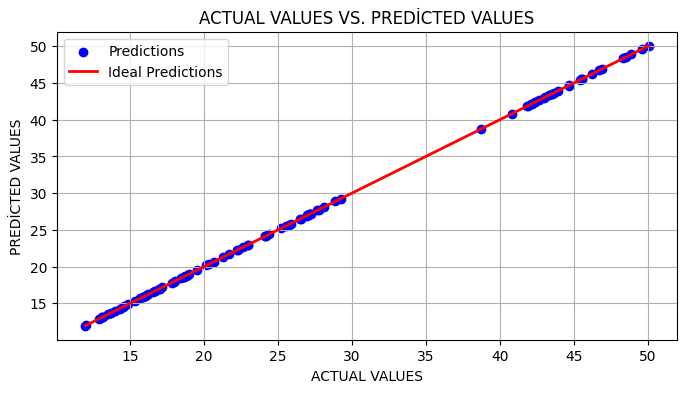

In [13]:
y_actual = y_test.values.flatten() 
y_predicted = regression_model.predict(x_test)  


plt.figure(figsize=(8, 4))
plt.scatter(y_actual, y_predicted, color='blue', label='Predictions')
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color='red', linewidth=2, label='Ideal Predictions')
plt.title('ACTUAL VALUES VS. PREDİCTED VALUES')
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDİCTED VALUES')
plt.legend()
plt.grid(True)
plt.show()